In [1]:
#*******************************************************************************************
 #
 #  File Name:  MarsWeatherPy.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, MarsWeatherPy.ipynb, uses the Python modules, 
 #      Splinter and Beautiful Soup to scrape information about weather on Mars from a 
 #      website.
 #
 #      The following command in Mac Terminal will suppress the warning/information 
 #      message upon launch of the Google Chrome browser:
 #
 #      xattr -d com.apple.quarantine /usr/local/bin/chromedriver
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  09/13/2023      Initial Development                     N. James George
 #
 #******************************************************************************************/

import PyFunctions as function
import PySubRoutines as subroutine
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine

import datetime as dt
import pandas as pd

from bs4 import BeautifulSoup as soup
from scipy.signal import find_peaks
from splinter import Browser

In [2]:
CONSTANT_LOCAL_FILE_NAME \
    = 'MarsWeatherPy.ipynb'

CONSTANT_MARS_WEATHER_URL \
    = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

CONSTANT_MARS_WEATHER_DATA_FILE \
    = './Resources/MarsWeatherData.csv'

CONSTANT_NUMBER_OF_EARTH_DAYS_MARTIAN_YEAR \
    = 687


log_subroutine \
    .SetLogMode \
        (False)

log_subroutine \
    .SetDebugMode \
        (False)

log_subroutine \
    .SetImageMode \
        (False)

log_subroutine \
    .BeginProgramExecution \
        ('MarsWeatherPy')

# **Section 1: Visit the [Mars Temperature Data Website](https://static.bc-edx.com/data/web/mars_facts/temperature.html)**

## **Splinter Web Driver**

In [3]:
chromeBrowserSplinterWebDriver \
    = Browser \
        ('chrome')


log_function \
    .DebugReturnObjectWriteObject \
        (chromeBrowserSplinterWebDriver)

## **Automated Browsing with Splinter**

In [4]:
chromeBrowserSplinterWebDriver \
    .visit \
        (CONSTANT_MARS_WEATHER_URL)

# **Section 2: Scrape the Table**

## **Scrape HTML to String**

In [5]:
webPageHTMLStringVariable \
    = chromeBrowserSplinterWebDriver \
        .html


log_function \
    .DebugReturnObjectWriteObject \
        (webPageHTMLStringVariable)

## **Beautiful Soup Object**

In [6]:
marsWeatherDataBeautifulSoupObject \
    = soup \
        (webPageHTMLStringVariable, 
         'html.parser')


log_function \
    .DebugReturnObjectWriteObject \
        (marsWeatherDataBeautifulSoupObject)

## **Mars Weather Table Retrieval**

In [7]:
weatherTableDataBSElementsObject \
    = marsWeatherDataBeautifulSoupObject \
        .find \
            ('table', 
             class_ \
                 = 'table')


log_function \
    .DebugReturnObjectWriteObject \
        (weatherTableDataBSElementsObject)

# **Section 3: Store the Table Information**

## **Header Text Extraction**

In [8]:
# This line of code creates an empty List for the table column headers.
headersStringList \
    = []


# This line of code extracts all the table column headers and stores 
# them in a Beautiful Soup Result Set Object.
headerBSResultSetObject \
    = weatherTableDataBSElementsObject \
        .find_all \
            ('th')


# This repetition loop extracts each header's text and stores them 
# in a List.
for headerElement in headerBSResultSetObject:
    
    headersStringList \
        .append \
            (headerElement.text)
    
    
log_function \
    .DebugReturnObjectWriteObject \
        (headersStringList)

## **Weather Informaton Text Extraction**

In [9]:
# This line of code creates an empty List for the weather information.
weatherTableDataDictionaryList \
    = []


# This line of code extracts all the rows of weather information
# from the Beautiful Soup Elements Object.
weatherTableDataBSResultSetObject \
    = weatherTableDataBSElementsObject \
        .find_all \
            ('tr', 
             class_ \
                 = 'data-row')


# This repetition loop extracts the weather table information 
# and stores it in a List. 
for row in weatherTableDataBSResultSetObject:

    rowDataBSResultSetObject \
        = row \
            .find_all \
                ('td')

    dataElementList \
        = []
    
    for dataElement in rowDataBSResultSetObject:
        
        dataElementList \
            .append \
                (dataElement.text)

    weatherTableDataDictionaryList \
        .append \
            (dataElementList)
    
    
log_function \
    .DebugReturnObjectWriteObject \
        (weatherTableDataDictionaryList)

## **Mars Weather DataFrame**

In [10]:
marsWeatherDataFrame \
    = pd \
        .DataFrame \
            (weatherTableDataDictionaryList, 
             columns \
                 = headersStringList)


log_function \
    .DebugReturnObjectWriteObject \
        (weatherTableDataDictionaryList)

## **Display Mars Weather DataFrame**

In [11]:
captionString \
    = 'Table 3.1: Mars Weather Data'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (marsWeatherDataFrame.head(12),
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

id,terrestrial_date,sol,ls,month,min_temp,pressure
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
57,2012-08-21,15,158,6,-78.0,740.0
68,2012-08-22,16,158,6,-77.0,740.0
79,2012-08-23,17,159,6,-76.0,742.0
112,2012-08-27,21,161,6,-74.0,741.0
114,2012-08-28,22,162,6,-74.0,742.0


# **Section 4: Prepare Data for Analysis**

## **Current Mars Weather Data Type Examination**

In [12]:
captionString \
    = 'Table 4.1: Mars Weather Data Types'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormatForSeries \
            (marsWeatherDataFrame.dtypes,
             captionString,
             'Column Name',
             'DTypes')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,DTypes
Column Name,
id,object
terrestrial_date,object
sol,object
ls,object
month,object
min_temp,object
pressure,object


## **Data Type Conversion**

In [13]:
marsWeatherDataFrame \
    [['id']] \
        = marsWeatherDataFrame \
            [['id']] \
                .astype \
                    (str)


marsWeatherDataFrame \
    ['terrestrial_date'] \
        = pd \
            .to_datetime \
                (marsWeatherDataFrame \
                    ['terrestrial_date']) \
            .dt \
                .date


marsWeatherDataFrame \
    [['sol', 'ls', 'month']] \
        = marsWeatherDataFrame \
            [['sol', 'ls', 'month']] \
                .astype \
                    (int)



marsWeatherDataFrame \
    [['min_temp', 'pressure']] \
        = marsWeatherDataFrame \
            [['min_temp', 'pressure']] \
                .astype \
                    (float)

## **Data Type Change Confirmation**

In [14]:
captionString \
    = 'Table 4.2: Updated Mars Weather Data Types'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormatForSeries \
            (marsWeatherDataFrame.dtypes,
             captionString,
             'Table Column Name',
             'DTypes')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,DTypes
Table Column Name,
id,object
terrestrial_date,object
sol,int64
ls,int64
month,int64
min_temp,float64
pressure,float64


# **Section 5: Analyze the Data**

## **5.1 -- How many months exist on Mars?**

In [15]:
numberOfMonthsOnMarsIntegerVariable \
    = marsWeatherDataFrame \
        ['month'] \
            .nunique()


log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'There are {:,} months on Mars.' \
             .format \
                (numberOfMonthsOnMarsIntegerVariable) \
         + '\033[0m')

There are 12 months on Mars.


## **5.2 -- How many Martian days' worth of data exist in the scraped data set?**

In [16]:
numberOfMartianDaysOfDataIntegerVariable \
    = marsWeatherDataFrame \
        ['sol'] \
            .count()


log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         'There are {:,} Martian days worth of data on this webpage.' \
             .format \
                 (numberOfMartianDaysOfDataIntegerVariable) \
         + '\033[0m')

There are 1,867 Martian days worth of data on this webpage.


## **5.3 -- What is the average minimum daily temperature by month?**

### **Average Minimum Daily Temperature By Month**

In [17]:
averageMinimumDailyTemperatureByMonthSeries \
    = marsWeatherDataFrame \
        .groupby \
            ('month') \
                ['min_temp'] \
                    .mean()

averageMinimumDailyTemperatureByMonthSeries \
    .name \
        = 'Month'

In [18]:
captionString \
    = 'Table 5.1: Average Low Temperature by Month'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormatForSeries \
            (averageMinimumDailyTemperatureByMonthSeries,
             captionString,
             averageMinimumDailyTemperatureByMonthSeries.name,
             'Temperature (° F)')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Temperature (° F)
Month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


### **Display**

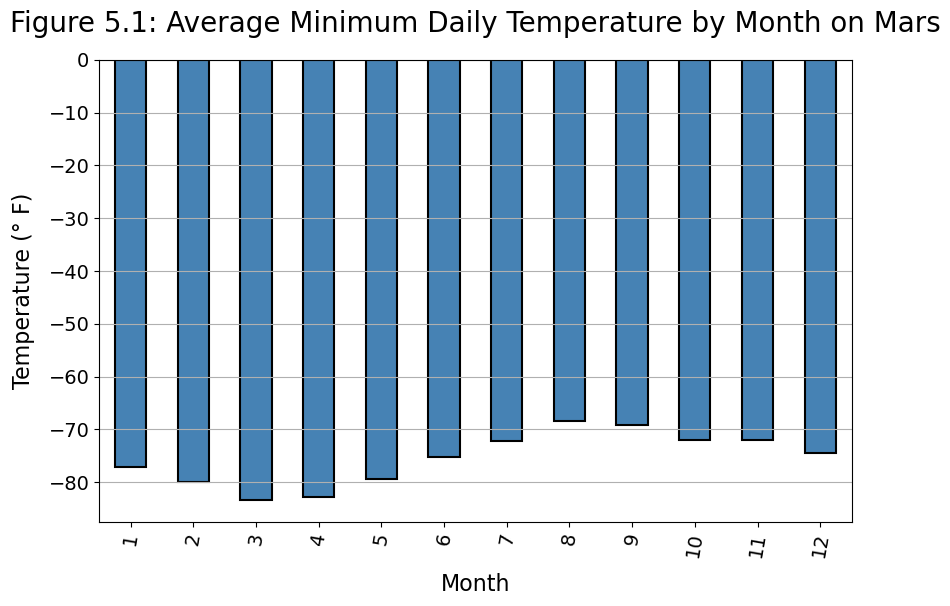

In [19]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (averageMinimumDailyTemperatureByMonthSeries, 
         'steelblue', 
         'Figure 5.1: Average Minimum Daily Temperature by Month on Mars', 
         'Temperature (° F)')

### **Coldest Month in Curiosity's Location**

In [20]:
coldestTemperatureIntegerVariable \
    = averageMinimumDailyTemperatureByMonthSeries \
        .min()

coldestMonthIntegerVariable \
    = averageMinimumDailyTemperatureByMonthSeries \
            [averageMinimumDailyTemperatureByMonthSeries \
                == coldestTemperatureIntegerVariable] \
            .index[0]

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'On average, the month with the coldest minimum daily temperature on Mars ' \
         + "in Curiosity's location is number {:,}." \
             .format \
                 (coldestMonthIntegerVariable) \
         + '\033[0m')

On average, the month with the coldest minimum daily temperature on Mars in Curiosity's location is number 3.


### **Warmest Month in Curiosity's Location**

In [21]:
warmestTemperatureIntegerVariable \
    = averageMinimumDailyTemperatureByMonthSeries \
        .max()

warmestMonthIntegerVariable \
    = averageMinimumDailyTemperatureByMonthSeries \
            [averageMinimumDailyTemperatureByMonthSeries \
                 == warmestTemperatureIntegerVariable] \
            .index[0]

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'On average, the month with the warmest minimum daily temperature on Mars ' \
         + "in Curiosity's location is number {:,}." \
             .format \
                 (warmestMonthIntegerVariable) \
         + '\033[0m')

On average, the month with the warmest minimum daily temperature on Mars in Curiosity's location is number 8.


## **5.4 -- What is the average daily atmospheric pressure by month?**

In [22]:
averagePressureByMonthSeries \
    = marsWeatherDataFrame \
        .groupby \
            ('month') \
                ['pressure'] \
        .mean()

averagePressureByMonthSeries \
    .name \
        = 'Month'

In [23]:
captionString \
    = 'Table 5.2: Average Daily Atmospheric Pressure by Month'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormatForSeries \
            (averagePressureByMonthSeries,
             captionString,
             averageMinimumDailyTemperatureByMonthSeries.name,
             'Air Pressure (Pa)')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Air Pressure (Pa)
Month,
1,862.49
2,889.46
3,877.32
4,806.33
5,748.56
6,745.05
7,795.11
8,873.83
9,913.31


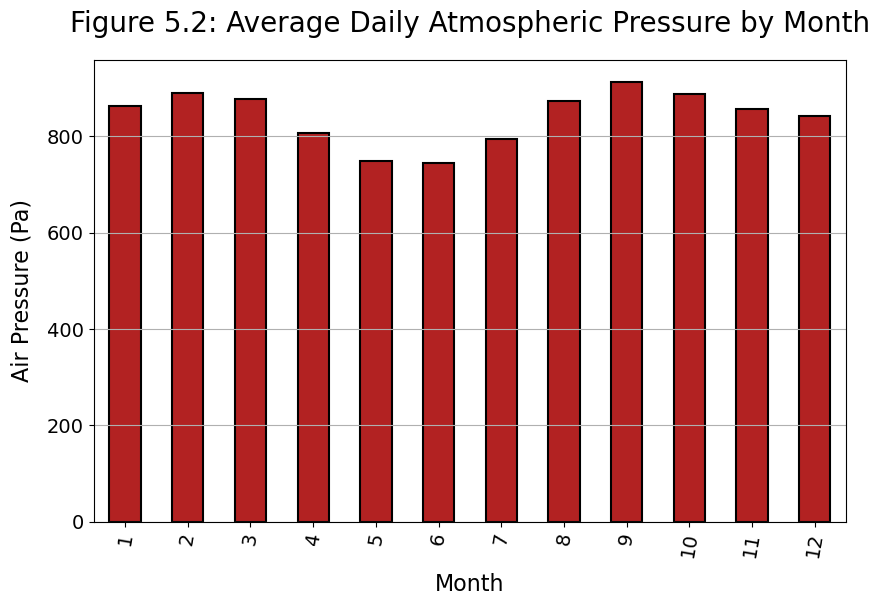

In [24]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (averagePressureByMonthSeries, 
         'firebrick', 
         'Figure 5.2: Average Daily Atmospheric Pressure by Month', 
         'Air Pressure (Pa)')

### **Month with the Lowest Average Daily Atmospheric Pressure in Curiosity's Location**

In [25]:
lowestPressureIntegerVariable \
    = averagePressureByMonthSeries \
        .min()

lowestPressureMonthIntegerVariable \
    = averagePressureByMonthSeries \
            [averagePressureByMonthSeries == lowestPressureIntegerVariable] \
                .index[0]

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'On average, the month with the lowest daily atmospheric pressure ' \
         + "on Mars in Curiosity's location is number {:,}." \
            .format \
                 (lowestPressureMonthIntegerVariable) \
         + '\033[0m')

On average, the month with the lowest daily atmospheric pressure on Mars in Curiosity's location is number 6.


### **Month with the Highest Average Daily Atmospheric Pressure in Curiosity's Location**

In [26]:
highestPressureIntegerVariable \
    = averagePressureByMonthSeries \
        .max()

highestPressureMonthIntegerVariable \
    = averagePressureByMonthSeries \
            [averagePressureByMonthSeries == highestPressureIntegerVariable] \
                .index[0]

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'On average, the month with the highest daily atmospheric pressure on Mars ' \
         + "in Curiosity's location is number {:,}." \
                .format \
                    (highestPressureMonthIntegerVariable) \
         + '\033[0m')

On average, the month with the highest daily atmospheric pressure on Mars in Curiosity's location is number 9.


## **5.5 -- How many terrestrial (earth) days are there in a Martian year?**

## **Solar Longitude**

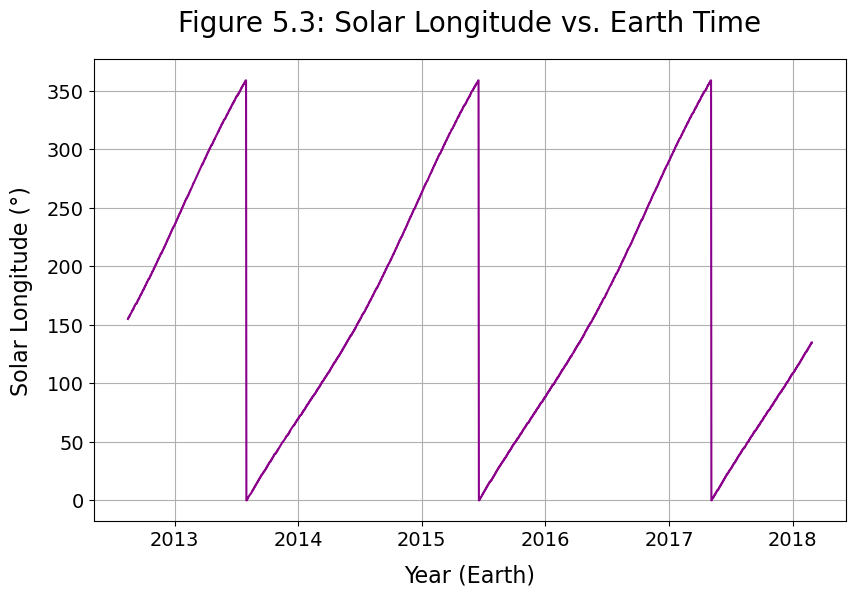

In [27]:
# Ls, solar longitude, is a measure of the time of year on Mars. Mars travels 360° 
# around the Sun in 1 Mars year, and the year begins at Ls 0° and ends at Ls 359°.
subroutine \
    .ReturnPlotFromXYSeries \
        (marsWeatherDataFrame \
             ['terrestrial_date'],
         marsWeatherDataFrame \
             ['ls'],
         'Figure 5.3: Solar Longitude vs. Earth Time',
         'Year (Earth)',
         'Solar Longitude (°)',
         ['darkmagenta'])

## **Solar Longitude Peaks**

In [28]:
solarLongitudePeaksNDArray, _ \
    = find_peaks \
        (marsWeatherDataFrame \
            ['ls'], 
         height 
            = 359)


log_function \
    .DebugReturnObjectWriteObject \
        (solarLongitudePeaksNDArray)

## **Display Solar Longitude Peaks**

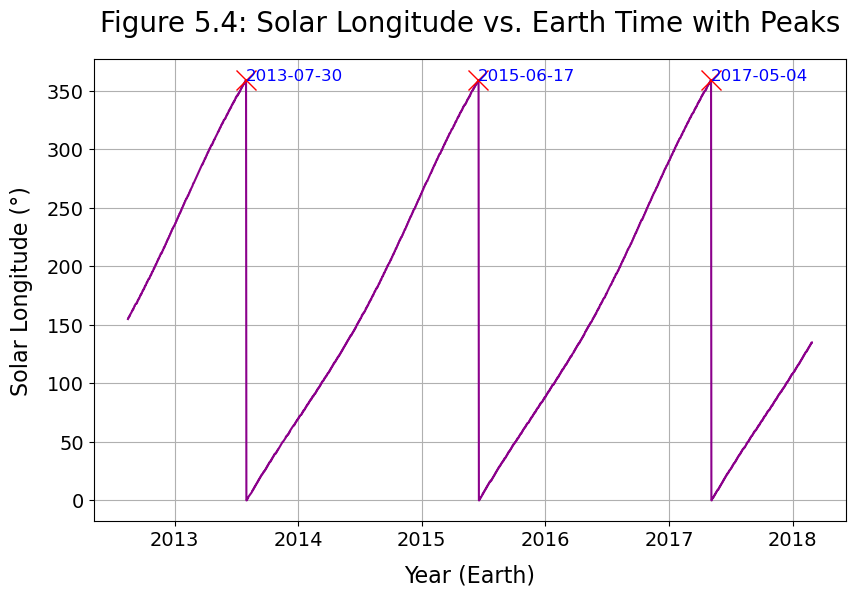

In [29]:
subroutine \
    .ReturnPlotFromXYSeries \
        (marsWeatherDataFrame \
             ['terrestrial_date'],
         marsWeatherDataFrame \
             ['ls'],
         'Figure 5.4: Solar Longitude vs. Earth Time with Peaks',
         'Year (Earth)',
         'Solar Longitude (°)',
         ['darkmagenta', 
          'red', 
          'blue'],
         solarLongitudePeaksNDArray)

## **Earth Days in a Martian Year from Solar Longitude**

In [30]:
earthDaysMartianYearSLIntegerVariable \
    = (marsWeatherDataFrame \
        ['terrestrial_date'] \
            [solarLongitudePeaksNDArray \
                 [len \
                      (solarLongitudePeaksNDArray)-1]] \
       - marsWeatherDataFrame \
            ['terrestrial_date'] \
                [solarLongitudePeaksNDArray \
                    [len \
                         (solarLongitudePeaksNDArray)-2]]) \
       .days

In [31]:
log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'According to peaks in solar longitude from the data set, there are ' \
         + '{:,} Earth days in a Martian year, which is ' \
            .format \
                (earthDaysMartianYearSLIntegerVariable)
         + 'the same as the 687 Earth days found through an Internet search.' \
         + '\033[0m')

According to peaks in solar longitude from the data set, there are 687 Earth days in a Martian year, which is the same as the 687 Earth days found through an Internet search.


## **Display Minimum Daily Temperature vs. Earth Time**

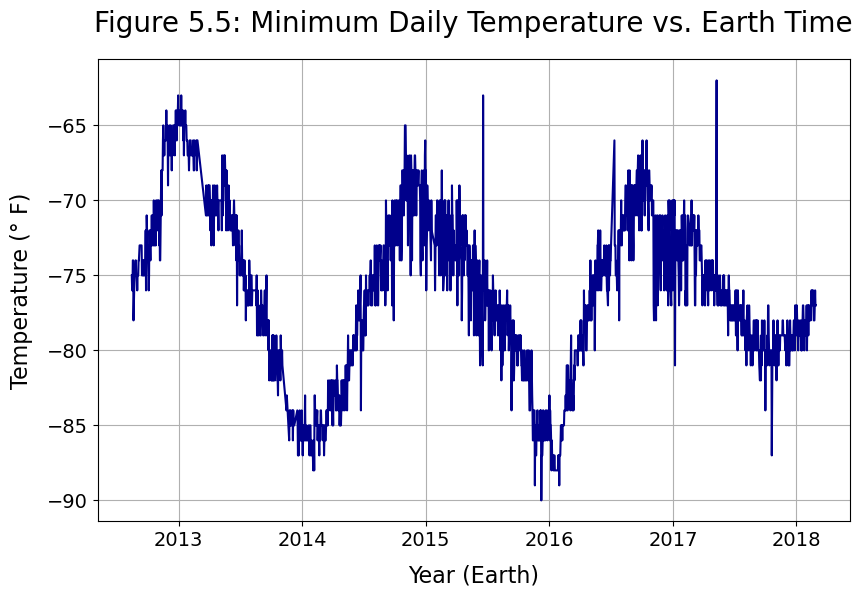

In [32]:
subroutine \
    .ReturnPlotFromXYSeries \
        (marsWeatherDataFrame \
             ['terrestrial_date'],
         marsWeatherDataFrame \
             ['min_temp'],
         'Figure 5.5: Minimum Daily Temperature vs. Earth Time',
         'Year (Earth)',
         'Temperature (° F)',
         ['darkblue'])

## **Calculation of Minimum Daily Temperature Peaks**

In [33]:
temperaturePeaksNDArray, _ \
    = find_peaks \
        (marsWeatherDataFrame \
            ['min_temp'], 
         height 
            = -67, 
         threshold \
            = 2, 
         distance \
            = 150, 
         width \
            = 1, 
         prominence \
            = [0,15])


log_function \
    .DebugReturnObjectWriteObject \
        (temperaturePeaksNDArray)

## **Display Minimum Daily Temperature Peaks**

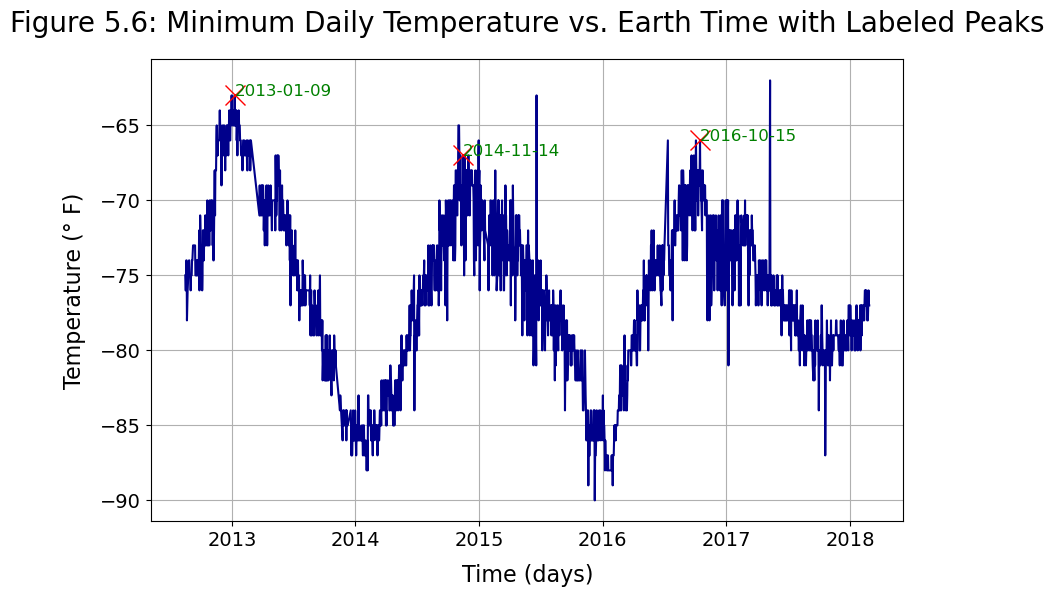

In [34]:
subroutine \
    .ReturnPlotFromXYSeries \
        (marsWeatherDataFrame['terrestrial_date'],
         marsWeatherDataFrame['min_temp'],
         'Figure 5.6: Minimum Daily Temperature vs. Earth Time with Labeled Peaks',
         'Time (days)',
         'Temperature (° F)',
         ['darkblue', 'red', 'green'],
         temperaturePeaksNDArray)

## **Earth Days in a Martian Year from Minimum Daily Temperature Peaks**

In [35]:
firstEarthDaysMartianYearMTIntegerVariable \
    = (marsWeatherDataFrame \
        ['terrestrial_date'] \
            [temperaturePeaksNDArray \
                 [len \
                      (temperaturePeaksNDArray)-2]] \
       - marsWeatherDataFrame \
            ['terrestrial_date'] \
                [temperaturePeaksNDArray \
                    [len \
                         (temperaturePeaksNDArray)-3]]) \
       .days

In [36]:
secondEarthDaysMartianYearMTIntegerVariable \
    = (marsWeatherDataFrame \
        ['terrestrial_date'] \
            [temperaturePeaksNDArray \
                 [len \
                      (temperaturePeaksNDArray)-1]] \
       - marsWeatherDataFrame \
            ['terrestrial_date'] \
                [temperaturePeaksNDArray \
                    [len \
                         (temperaturePeaksNDArray)-2]]) \
       .days

In [37]:
daysIntegerList \
    = [firstEarthDaysMartianYearMTIntegerVariable,
       secondEarthDaysMartianYearMTIntegerVariable]

averageEarthDaysMartianYearMTIntegerVariable \
    = sum(daysIntegerList) / len(daysIntegerList)

In [38]:
log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'According to peaks in minimum daily temperatures, ' \
         + 'the number of Earth days in a Martian year range from ' \
         + '{:,} to ' \
                 .format \
                     (firstEarthDaysMartianYearMTIntegerVariable)
         + '{:,} ' \
                 .format \
                     (secondEarthDaysMartianYearMTIntegerVariable)
         + 'with an average of {:,.1f}, ' \
             .format(averageEarthDaysMartianYearMTIntegerVariable) \
         + 'which is about the same as the 687 Earth days found through an Internet search.' 
         + '\033[0m')

According to peaks in minimum daily temperatures, the number of Earth days in a Martian year range from 674 to 701 with an average of 687.5, which is about the same as the 687 Earth days found through an Internet search.


# **Section 6: Save the Data**

## **Export DataFrame to CSV file**

In [39]:
marsWeatherDataFrame \
    .to_csv \
        (CONSTANT_MARS_WEATHER_DATA_FILE)

## **Close Browser**

In [40]:
chromeBrowserSplinterWebDriver \
    .quit()

In [41]:
#log_subroutine \
#    .EndProgramExecution()